<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W8D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import re
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from spacy.lang.en import English
from nltk import pos_tag, ne_chunk

In [2]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
# Load texts
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]

In [4]:
import re
# Function to load texts from URLs, clean non-words, and return corpus
def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text

        # Cleaning non-words using regular expressions
        text = re.sub(r'\W+', ' ', text)

        # Finding start marker
        start_marker = 'START OF THIS PROJECT rg eBook of'
        start_index = text.find(start_marker) + len(start_marker)

        # Finding end marker
        end_marker = 'End of the Project Gutenberg'
        end_index = text.find(end_marker)

        text = text[start_index:end_index].strip()

        # Remove uppercase words, numbers, and underscores
        text = re.sub(r'\b[A-Z0-9_]+\b', '', text)

        corpus.append(text)

    return corpus

In [5]:
corpus = load_texts(urls)
# Print first 200 characters of each text
for text in corpus:
    print(text[:200])

Alice s Adventures in Wonderland This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy 
Through the Looking Glass This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy it give
 Tangled Tale This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy it give it away or 


In [6]:
# Function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [7]:
# Tokenize and print first 150 tokens of each book
for text in corpus:
    tokens = tokenize_text(text)
    print(tokens[:150])

['Alice', 's', 'Adventures', 'in', 'Wonderland', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'org', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', 'Title', 'Alice', 's', 'Adventures', 'in', 'Wonderland', 'Author', 'Lewis', 'Carroll', 'Release', 'date', 'June', 'eBook', 'Most', 'recently', 'updated', 'February', 'Language', 'English', 'Credits', 'Arthur', 'DiBianca', 'and', 'David', 'Widger', 'Illustrat

In [8]:
# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

In [9]:
# Remove stopwords
filtered_tokens = remove_stopwords(tokens)
# Check if stopwords were removed by counting occurrences of some stop words
stopwords_to_check = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 's']
for stopword in stopwords_to_check:
    count = filtered_tokens.count(stopword)
    print(f"Occurrences of '{stopword}': {count}")

# Print the filtered tokens
print(filtered_tokens[:150])

Occurrences of 'i': 0
Occurrences of 'me': 0
Occurrences of 'my': 0
Occurrences of 'myself': 0
Occurrences of 'we': 0
Occurrences of 'our': 0
Occurrences of 'ours': 0
Occurrences of 'ourselves': 0
Occurrences of 's': 0
['Tangled', 'Tale', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'United', 'States', 'check', 'laws', 'country', 'located', 'using', 'eBook', 'Title', 'Tangled', 'Tale', 'Author', 'Lewis', 'Carroll', 'Illustrator', 'Frost', 'Release', 'date', 'June', 'eBook', 'recently', 'updated', 'January', 'Language', 'English', 'Credits', 'Produced', 'Chris', 'Curnow', 'Carla', 'Foust', 'Lindy', 'Walsh', 'Online', 'Distributed', 'Proofreading', 'Team', 'https', 'www', 'pgdp', 'net', 'Music', 'transcribed', 'Linda', 'Cantoni', 'Produced', 'Chris', 'Curnow', '

In [10]:
# Function to perform stemming
def stem_tokens(filtered_tokens):
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(word) for word in filtered_tokens]
    return stemmed_tokens

In [11]:
# Stem tokens and print first 50
for text in corpus:
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    stemmed_tokens = stem_tokens(filtered_tokens)
    print(stemmed_tokens[:50])

['alic', 'adventur', 'wonderland', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www', 'gutenberg', 'org', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', 'titl', 'alic', 'adventur', 'wonderland', 'author', 'lewi', 'carrol', 'releas', 'date', 'june', 'ebook']
['look', 'glass', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www', 'gutenberg', 'org', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', 'titl', 'look', 'glass', 'author', 'lewi', 'carrol', 'releas', 'date', 'june', 'ebook', 'recent', 'updat']
['tangl', 'tale', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world

In [12]:
# Function to perform lemmatization on filtered tokens
def lemmatize_tokens(filtered_tokens):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(" ".join(filtered_tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

In [13]:
# Lemmatize tokens and print first 50
for text in corpus:
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)
    print(lemmatized_tokens[:50])

['Alice', 'Adventures', 'Wonderland', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'Project', 'Gutenberg', 'License', 'include', 'ebook', 'online', 'www', 'gutenberg', 'org', 'locate', 'United', 'States', 'check', 'law', 'country', 'locate', 'use', 'eBook', 'Title', 'Alice', 'Adventures', 'Wonderland', 'Author', 'Lewis', 'Carroll', 'Release', 'date', 'June', 'eBook']
['look', 'Glass', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'Project', 'Gutenberg', 'License', 'include', 'ebook', 'online', 'www', 'gutenberg', 'org', 'locate', 'United', 'States', 'check', 'law', 'country', 'locate', 'use', 'eBook', 'Title', 'Looking', 'Glass', 'Author', 'Lewis', 'Carroll', 'Release', 'date', 'June', 'eBook', 'recently', 'update']
['tangle', 'Tale', 'ebook', '

In [15]:
# Identify POS tags of each text
for text in corpus:
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    print(pos_tags[:50])

[('Alice', 'NNP'), ('s', 'NN'), ('Adventures', 'NNP'), ('in', 'IN'), ('Wonderland', 'NNP'), ('This', 'DT'), ('ebook', 'NN'), ('is', 'VBZ'), ('for', 'IN'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('and', 'CC'), ('most', 'JJS'), ('other', 'JJ'), ('parts', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('world', 'NN'), ('at', 'IN'), ('no', 'DT'), ('cost', 'NN'), ('and', 'CC'), ('with', 'IN'), ('almost', 'RB'), ('no', 'DT'), ('restrictions', 'NNS'), ('whatsoever', 'IN'), ('You', 'PRP'), ('may', 'MD'), ('copy', 'VB'), ('it', 'PRP'), ('give', 'VB'), ('it', 'PRP'), ('away', 'RB'), ('or', 'CC'), ('re', 'VB'), ('use', 'IN'), ('it', 'PRP'), ('under', 'IN'), ('the', 'DT'), ('terms', 'NNS'), ('of', 'IN'), ('the', 'DT')]
[('Through', 'IN'), ('the', 'DT'), ('Looking', 'NNP'), ('Glass', 'NNP'), ('This', 'DT'), ('ebook', 'NN'), ('is', 'VBZ'), ('for', 'IN'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('

Comparison:

Stemming reduces words to their base or root form, resulting in tokens like "alic" instead of "Alice" and "adventur" instead of "Adventure". Stemming doesn't consider the context of words.
Lemmatization, on the other hand, provides more meaningful tokens by converting words to their base or dictionary form. Tokens like "Alice" and "Adventure" are preserved.

While stemming may result in shorter tokens, it may also produce non-dictionary words or incorrect stems. Lemmatization ensures that the resulting tokens are valid words in the language.

In summary, lemmatization generally produces more accurate and meaningful tokens compared to stemming.

In [14]:
# Identify named entities of each text
for text in corpus:
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    named_entities = ne_chunk(pos_tags)
    print(named_entities[:150])

[Tree('GPE', [('Alice', 'NNP')]), ('s', 'NN'), ('Adventures', 'NNP'), ('in', 'IN'), Tree('GPE', [('Wonderland', 'NNP')]), ('This', 'DT'), ('ebook', 'NN'), ('is', 'VBZ'), ('for', 'IN'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('and', 'CC'), ('most', 'JJS'), ('other', 'JJ'), ('parts', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('world', 'NN'), ('at', 'IN'), ('no', 'DT'), ('cost', 'NN'), ('and', 'CC'), ('with', 'IN'), ('almost', 'RB'), ('no', 'DT'), ('restrictions', 'NNS'), ('whatsoever', 'IN'), ('You', 'PRP'), ('may', 'MD'), ('copy', 'VB'), ('it', 'PRP'), ('give', 'VB'), ('it', 'PRP'), ('away', 'RB'), ('or', 'CC'), ('re', 'VB'), ('use', 'IN'), ('it', 'PRP'), ('under', 'IN'), ('the', 'DT'), ('terms', 'NNS'), ('of', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('Project', 'NNP'), ('Gutenberg', 'NNP'), ('License', 'NNP')]), ('included', 'VBD'), ('with', 'IN'), ('this', 'DT')

The named entities identified in each text are presented below:

**Alice’s Adventures in Wonderland:**
- GPE (Geopolitical Entity): Alice, Wonderland, United States
- ORGANIZATION: Project Gutenberg License, eBook Title
- PERSON: Lewis Carroll, Arthur DiBianca, David Widger

**THROUGH THE LOOKING-GLASS And What Alice Found There:**
- GPE: United States
- ORGANIZATION: Project Gutenberg License, eBook Title
- PERSON: Alice, Lewis Carroll, Tweedledee, Tweedledum, Queen, King, Daisy, Daisy, Lion

**A Tangled Tale:**
- GPE: United States
- ORGANIZATION: Project Gutenberg License, eBook Title
- PERSON: Lewis Carroll, Frost, Arthur DiBianca, David Widger, Chris Curnow, Carla Foust, Lindy Walsh, Linda Cantoni

These named entities include geographical locations (GPE), organizations (ORGANIZATION), and people (PERSON) mentioned in the texts.

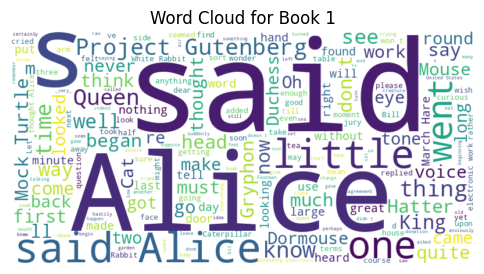

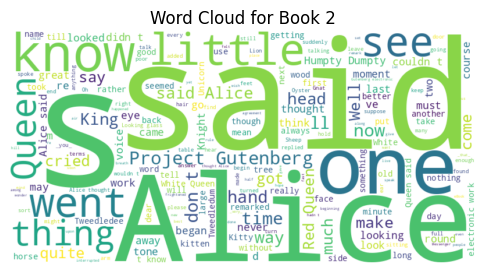

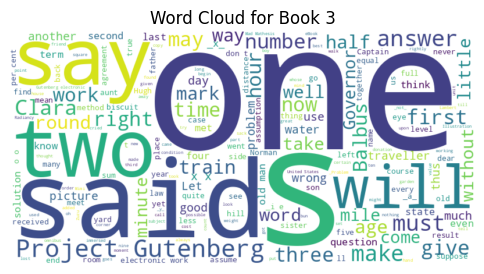

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and display word cloud for each book
for i, text in enumerate(corpus):
    generate_wordcloud(text, f"Word Cloud for Book {i+1}")

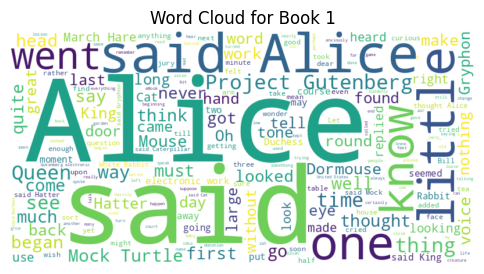

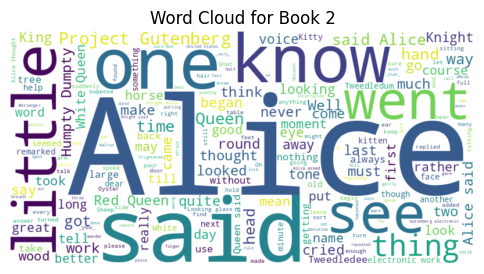

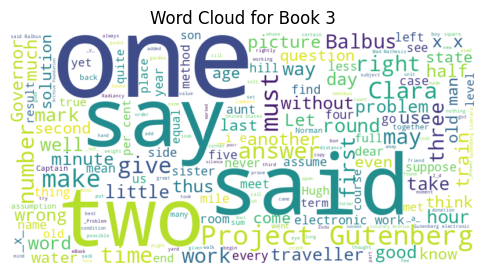

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud_from_tokens(tokens, title):
    text = ' '.join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and display word cloud for each book using filtered_tokens
for i, text in enumerate(corpus):
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    generate_wordcloud_from_tokens(filtered_tokens, f"Word Cloud for Book {i+1}")


In [ ]:
from collections import Counter

# Combine filtered tokens from all books into a single list
all_filtered_tokens = []
for text in corpus:
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    all_filtered_tokens.extend(filtered_tokens)

# Count the occurrences of each word
word_counts = Counter(all_filtered_tokens)

# Get the five most frequent words
top_five_words = word_counts.most_common(5)

# Print the results
print("Five most frequent words in all the books:")
for word, count in top_five_words:
    print(f"{word}: {count}")


Five most frequent words in all the books:
said: 1061
Alice: 869
one: 421
little: 277
Queen: 262


In the case of finding the most frequent words, using filtered text with stopwords removed is often a good choice as it focuses on meaningful content words while disregarding common stopwords.

In [ ]:
# Combine filtered tokens from all books into a single list
all_filtered_tokens = []
for i, text in enumerate(corpus, 1):
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    all_filtered_tokens.extend(filtered_tokens)

# Create a Counter object to count the occurrences of each word
word_counts = Counter(all_filtered_tokens)

# Print the Bag of Words representation
print("Document Number\tIndex\tWord\tFrequency")
for i, text in enumerate(corpus, 1):
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    word_counts_per_doc = Counter(filtered_tokens)
    for word, count in word_counts_per_doc.items():
        print(f"{i}\t\t\t{list(word_counts.keys()).index(word)}\t{word}\t{count}")

In [ ]:
# Combine filtered tokens from all books into a single list
all_filtered_tokens = []
for i, text in enumerate(corpus, 1):
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    all_filtered_tokens.extend(filtered_tokens)

# Create a Counter object to count the occurrences of each word
word_counts = Counter(all_filtered_tokens)

# Print the first 200 entries of the Bag of Words representation
print("Index\tWord\tFrequency")
for index, (word, frequency) in enumerate(word_counts.items(), 1):
    print(f"{index}\t{word}\t{frequency}")
    if index == 200:
        break

Index	Word	Frequency
1	Alice	869
2	Adventures	5
3	Wonderland	6
4	ebook	6
5	use	80
6	anyone	15
7	anywhere	9
8	United	46
9	States	45
10	parts	10
11	world	21
12	cost	23
13	almost	28
14	restrictions	6
15	whatsoever	6
16	may	104
17	copy	37
18	give	62
19	away	82
20	terms	64
21	Project	249
22	Gutenberg	249
23	License	30
24	included	9
25	online	12
26	www	29
27	gutenberg	27
28	org	27
29	located	21
30	check	14
31	laws	30
32	country	23
33	using	21
34	eBook	24
35	Title	3
36	Author	3
37	Lewis	5
38	Carroll	5
39	Release	3
40	date	9
41	June	3
42	recently	3
43	updated	3
44	February	1
45	Language	4
46	English	14
47	Credits	3
48	Arthur	3
49	DiBianca	1
50	David	2
51	Widger	2
52	Illustration	10
53	Contents	2
54	Rabbit	47
55	Hole	2
56	Pool	2
57	Tears	2
58	Caucus	4
59	Race	2
60	Long	4
61	Tale	5
62	Sends	2
63	Little	5
64	Bill	19
65	Advice	2
66	Caterpillar	28
67	Pig	3
68	Pepper	4
69	Mad	17
70	Tea	2
71	Party	2
72	Queen	262
73	Croquet	2
74	Ground	2
75	Mock	58
76	Turtle	61
77	Story	2
78	Lobster	6
79	Quadrille	5
8

In [ ]:
# Count the occurrences of each word
word_counts = Counter(all_filtered_tokens)

# Get the 5 most common words
top_words = word_counts.most_common(5)

print("The 5 most frequently mentioned words:")
for word, frequency in top_words:
    print(f"{word}: {frequency}")

The 5 most frequently mentioned words:
said: 1061
Alice: 869
one: 421
little: 277
Queen: 262


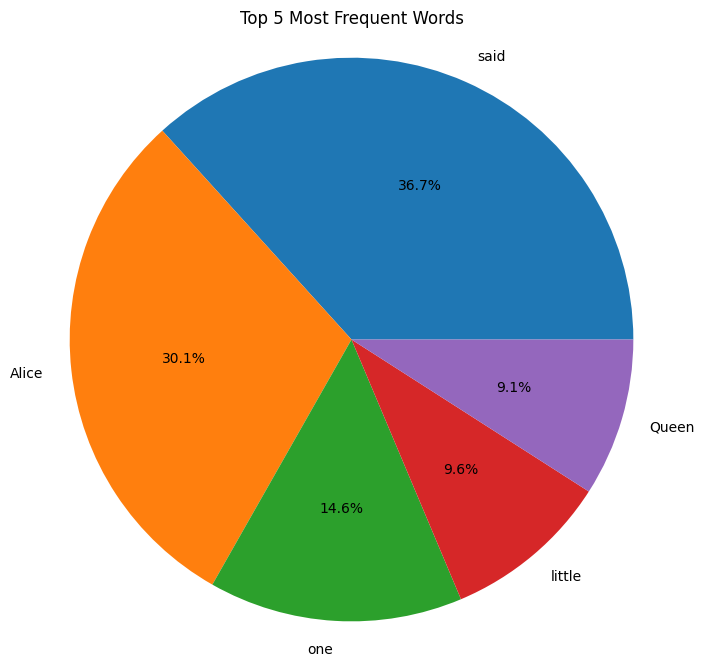

In [ ]:
import matplotlib.pyplot as plt

# Extract the top 5 words and their frequencies
top_words = [word for word, _ in word_counts.most_common(5)]
word_frequencies = [frequency for _, frequency in word_counts.most_common(5)]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(word_frequencies, labels=top_words, autopct='%1.1f%%')
plt.title('Top 5 Most Frequent Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The 5 most frequently mentioned words, "said", "Alice", "one", "little", and "Queen", appear to be a mix of expected and informative words:

"said": It's expected to see common verbs like "said" frequently mentioned in texts, especially in dialogue-heavy works like "Alice's Adventures in Wonderland".

"Alice": Given that "Alice" is the name of the protagonist and the title character of the book, it's expected to see her name mentioned frequently.

"one": This word may not be as informative on its own, but it could be indicative of the narrative style or the frequent occurrence of numeric references in the text.

"little": This word could be descriptive, reflecting the frequent use of diminutives or references to small objects or characters in the story.

"Queen": Given the presence of characters like the Queen of Hearts in "Alice's Adventures in Wonderland", it's expected to see this word mentioned frequently as well.

Some of these words may be expected due to the nature of the text

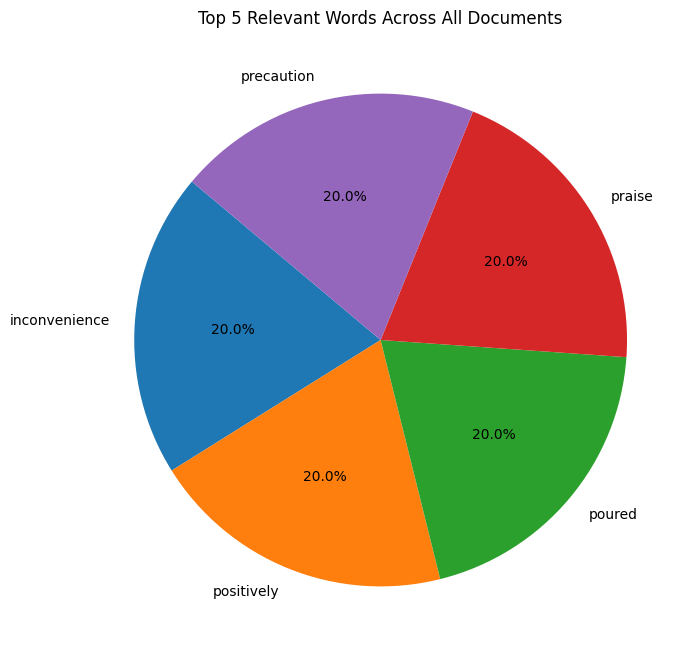

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)

# Fit and transform the corpus using the TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(all_filtered_tokens)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Compute the average TF-IDF score for each word across all documents
avg_tfidf_scores = np.mean(tfidf_matrix, axis=0).A1

# Get indices of top 5 words based on average TF-IDF scores
top_indices = avg_tfidf_scores.argsort()[-5:][::-1]

# Get top 5 words and their average TF-IDF scores
top_words = [feature_names[idx] for idx in top_indices]
top_scores = [avg_tfidf_scores[idx] for idx in top_indices]

# Plot pie chart for the top 5 most relevant words across all documents
plt.figure(figsize=(8, 8))
plt.pie(top_scores, labels=top_words, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Relevant Words Across All Documents")
plt.show()



The difference in results between the two approaches lies in how they calculate the relevance of words across all documents in the corpus. Let's break down each approach to understand why they yield different outcomes.

In the first approach, we directly computed the TF-IDF scores for each word in every document and then identified the top 5 words with the highest TF-IDF scores for each document individually. This means we focused on the uniqueness of words within each document, without considering their importance relative to the entire corpus.

On the other hand, the second approach aimed to find the top 5 words that are most relevant across all documents in the corpus. It computed the average TF-IDF score for each word across all documents, indicating how important each word is in the corpus as a whole. Consequently, this approach prioritizes words that are significant across multiple documents, potentially capturing more general themes or topics present in the entire corpus.

So, the difference essentially boils down to whether we're emphasizing the uniqueness of words within individual documents or their importance across the entire corpus. Depending on the specific analysis or insights we're seeking, we may opt for one approach over the other.